In [3]:
#importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#reading uber request csv file
uber_request = pd.read_csv("C:/Users/shubham/Desktop/Data science/Uber Supply Demand Gap/Uber Request Data.csv")
uber_request.head()

Request id Pickup point  Driver id          Status    Request timestamp  \
0         619      Airport        1.0  Trip Completed      11/7/2016 11:51   
1         867      Airport        1.0  Trip Completed      11/7/2016 17:57   
2        1807         City        1.0  Trip Completed       12/7/2016 9:17   
3        2532      Airport        1.0  Trip Completed      12/7/2016 21:08   
4        3112         City        1.0  Trip Completed  13-07-2016 08:33:16   

        Drop timestamp  
0      11/7/2016 13:00  
1      11/7/2016 18:47  
2       12/7/2016 9:58  
3      12/7/2016 22:03  
4  13-07-2016 09:25:47

In [5]:
uber_request.info()
uber_request.describe()
uber_request.columns
uber_request.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


(6745, 6)

In [6]:
#converting Request timestamp and Drop timestamp columns into datatime format
uber_request['Request timestamp'] = pd.to_datetime(uber_request['Request timestamp'])
uber_request['Drop timestamp'] = pd.to_datetime(uber_request['Drop timestamp'])

In [7]:
uber_request.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.2+ KB


In [8]:
#taking out hours from Request timestamp for further analysis
uber_request['Request_hours'] = uber_request['Request timestamp'].dt.hour

In [9]:
#taking out hours from Drop timestamp for further analysis
uber_request['Drop_hours'] = uber_request['Drop timestamp'].dt.hour 

In [10]:
uber_request.head()

Request id Pickup point  Driver id          Status   Request timestamp  \
0         619      Airport        1.0  Trip Completed 2016-11-07 11:51:00   
1         867      Airport        1.0  Trip Completed 2016-11-07 17:57:00   
2        1807         City        1.0  Trip Completed 2016-12-07 09:17:00   
3        2532      Airport        1.0  Trip Completed 2016-12-07 21:08:00   
4        3112         City        1.0  Trip Completed 2016-07-13 08:33:16   

       Drop timestamp  Request_hours  Drop_hours  
0 2016-11-07 13:00:00             11        13.0  
1 2016-11-07 18:47:00             17        18.0  
2 2016-12-07 09:58:00              9         9.0  
3 2016-12-07 22:03:00             21        22.0  
4 2016-07-13 09:25:47              8         9.0

In [11]:
uber_request.isnull().sum()
#uber_request.isnull().sum(axis = 1)

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
Request_hours           0
Drop_hours           3914
dtype: int64

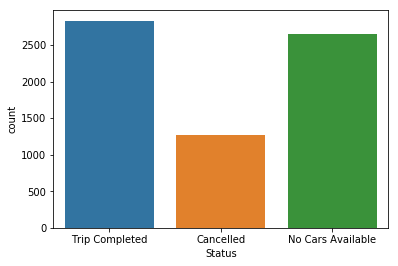

In [13]:
sns.countplot(x = 'Status',data = uber_request)
#Below plot helps to visualise the frequency of requests that get cancelled, show 'no cars available' and trips completed.
#Request showing 'no cars available' are showing high numbers at around 2500 and canceled at around 1200 as against trips completed which is more than 2500.

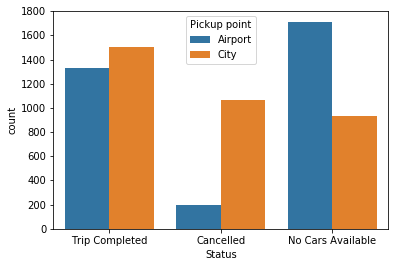

In [81]:
sns.countplot(x = 'Status',hue = 'Pickup point',  data = uber_request)
#Below plot helps to visualise the frequency of requests that get cancelled, show 'no cars available' and trips completed from pickup point as Airport or city.
#Clearly there are good number of request which are in canceled state from pickup point city.
#Because of good number of request being cancelled from city, huge number of request are in 'no cars available' status from pickup point airport.

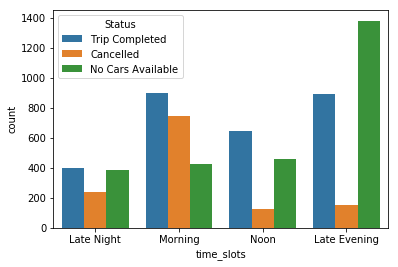

In [15]:
uber_request['time_slots'] = pd.cut(uber_request['Request_hours'], [0,6,12,18,24], labels=["Late Night", "Morning", "Noon","Late Evening"],right=False)
sns.countplot(x = 'time_slots', hue = 'Status', data = uber_request)
#Below plot shows the frequency of requests that gets canceled, show no cars available or trip completed on the basis of timimgs.
#Clearly we can see around 1400 requests showing 'no cars available' during late evening and there were 2500 total request showing 'no cars available'
#which clearly tells that most of the 'no cars available' status are during late evening.

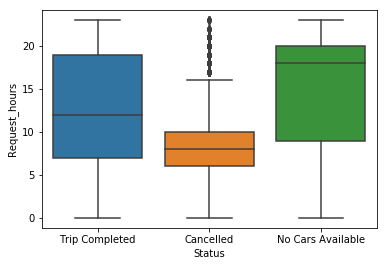

In [16]:
sns.boxplot(x='Status', y='Request_hours', data=uber_request)
#Below plot helps to visualise the timings when most requests that get cancelled or show 'no cars available'.
#Most request are cancelled during early hours and during late evening most number of request are showing 'no cars available'.

In [64]:
#creating a new column and inserting 1 for each status since demand includes all the status
uber_request['Demand'] = 1

In [65]:
#creating a new column and inserting 1 for status 'trip completed' and 0 for 'canceled' and 'no cars available'
uber_request['Supply'] = [1 if x == 'Trip Completed' else 0 for x in uber_request['Status']]

In [66]:
#grouping by request hours using pivot table 
demand_supply = uber_request.pivot_table(values = ['Demand','Supply'], index = 'Request_hours', aggfunc = 'sum')

In [67]:
#taking out the percentage of how much demand is met.
#demand_supply['Difference'] = demand_supply['Demand'] - demand_supply['Supply']
demand_supply['Percentage_Supply'] = (demand_supply['Supply'] / demand_supply['Demand'])*100

In [68]:
#cutting into different time slots
demand_supply['time_slots'] = pd.cut(demand_supply.index, [0,6,12,18,24], labels=["Late Night", "Morning", "Noon","Late Evening"],right=False)

In [69]:
demand_supply.sort_values(by = 'Percentage_Supply')
#clearly we can see demand for late evening slot is not met at all with only around 30% supply.

Demand  Supply  Percentage_Supply    time_slots
Request_hours                                                 
1                  85      25          29.411765    Late Night
21                449     142          31.625835  Late Evening
18                510     164          32.156863  Late Evening
20                492     161          32.723577  Late Evening
19                473     166          35.095137  Late Evening
17                418     151          36.124402          Noon
8                 423     155          36.643026       Morning
3                  92      34          36.956522    Late Night
2                  99      37          37.373737    Late Night
4                 203      78          38.423645    Late Night
9                 431     173          40.139211       Morning
0                  99      40          40.404040    Late Night
5                 445     185          41.573034    Late Night
6                 398     167          41.959799       Morning
7                 406     174          42.857143       Morning
10                243     116          47.736626       Morning
22                304     154          50.657895  Late Evening
23                194     103          53.092784  Late Evening
13                160      89          55.625000          Noon
16                159      91          57.232704          Noon
15                171     102          59.649123          Noon
14                136      88          64.705882          Noon
12                184     121          65.760870          Noon
11                171     115          67.251462       Morning

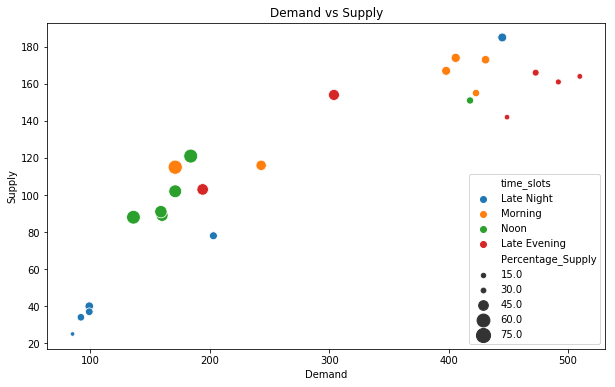

In [74]:
plt.figure(figsize=(10, 6))
plt.title('Demand vs Supply')
sns.scatterplot(x = 'Demand',y = 'Supply', hue = 'time_slots', size = "Percentage_Supply", sizes = (20,200), data = demand_supply)
#scatter plot which shows demand vs supply plot where different colours suggest time slots and size tells the percentage supply.
#clearly late evening and late night demands are not met at all with percentage as low as around 30%.

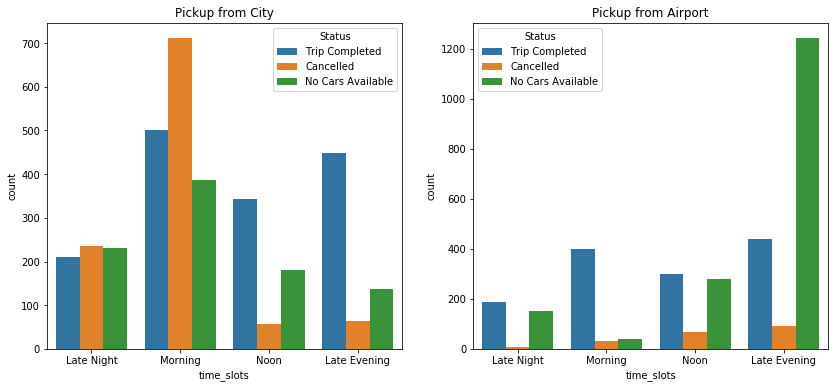

In [75]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
plt.title("Pickup from City")
sns.countplot(x = 'time_slots', hue = 'Status', data = uber_request.loc[uber_request['Pickup point'] == 'City'])
plt.subplot(1,2,2)
plt.title("Pickup from Airport")
sns.countplot(x = 'time_slots', hue = 'Status', data = uber_request.loc[uber_request['Pickup point'] == 'Airport'])
#count plots for different status for plotting demand and supply from pickup points as airport and city.
#late evenings is the status which is worst hit as seen earlier. 
#From airport there are high numbers of 'no cars available' since high numbers of request are canceled from city during morning.
#During late night as well trips completed is half to request canceled and no cars available from city.